## Chelsey De Dios
## D208 Predictive Modeling
## 11/06/2021


# D208 Task 1 Multiple Regression for Predictive Modeling

## Part I: Research Question

### A.  Describe the purpose of this data analysis by doing the following:

#### 1.  Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using multiple regression.

The research question for this analysis will be whether we can predict if a customer will leave the compant (churn) based on factors about the services they are subscribed to such as Phone, Internet Type and Tech Support.

#### 2.  Define the objectives or goals of the data analysis. Ensure that your objectives or goals are reasonable within the scope of the data dictionary and are represented in the available data.

The objective of this analysis will be to discover whether service factors in our data are good predictors of customer leaving the company and to create a model to attempt to predict a customer leaving using multiple linear regression.

## Part II: Method Justification

### B.  Describe multiple regression methods by doing the following:
 
#### 1.  Summarize the assumptions of a multiple regression model.

A multiple linear regression model model assumes that there is a linear relationship between variables and a target variable, that variables aside from the target variables are mostly independent of eachother, and that the residual error in the datapoints to the fitted line has a normal distribution.

#### 2.  Describe the benefits of using the tool(s) you have chosen (i.e., Python, R, or both) in support of various phases of the analysis.

I have chosen Python due to the availability of the libraries sci-kitlearn and pandas. Pandas allows for the easy manipulation of data in dataframes and sci-kitlearn allows for the black box use of machine learning algorithms such as linear regression.

#### 3.  Explain why multiple regression is an appropriate technique to analyze the research question summarized in Part I.

In this case multiple linear regression is a good choice because there are multiple variables to be related to one respone variable, which would be churn. If there is a linear relationship between these variables and churn then it would give us an indication that these variables affect the churn rate, which is useful information for deciding on factors in customer retention.

## Part III: Data Preparation

### C.  Summarize the data preparation process for multiple regression analysis by doing the following:

#### 1.  Describe your data preparation goals and the data manipulations that will be used to achieve the goals.

- Change datatypes to types that will support our goals, such as changing strings/objects to categories so we can easily convert them to dummy variables later on.
- Remove columns which are uneccessary to our analysis
- Check remaining columns to look for excessive collinearity to avoid breaking the assumption of variable independence for multiple linear regression.
- Get dummy variables for categorical variables
- Reorder Columns for Target Variable to be at the end
- Split data into training/testing sets to fit and score our linear regression model.

In [29]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# import data from csv
df = pd.read_csv('churn_clean.csv')

# set it so we can see all columns
pd.set_option('display.max_columns', None)

In [31]:
# create a dictionary of current column names mapping to desired column names
survey_dict = {'Item1':'timely_responses', 
               'Item2':'timely_fixes', 
               'Item3':'timely_replacements', 
               'Item4':'reliability', 
               'Item5':'options', 
               'Item6':'respectful_response', 
               'Item7':'courteous_exchange', 
               'Item8':'evidence_of_active_listening'}

# rename the column names based on survey_dict
df = df.rename(columns=survey_dict)

##### Change Data Types

Now we will change the datatypes of our columns by passing a dictionary to df.astype mapping our column names to their new typing.

In [32]:
# change the dataframe columns to more appropriate data types
df = df.astype({'Population':int, 
                'Area':'category',
                'Children':int, 
                'Age':int,
                'Income':float, 
                'Marital':'category', 
                'Gender':'category', 
                'Outage_sec_perweek':float, 
                'Email':int, 
                'Contacts':int, 
                'Yearly_equip_failure':int,
                'Techie':'category', 
                'Contract':'category', 
                'Port_modem':'category', 
                'Tablet':'category', 
                'InternetService':'category',
                'Phone':'category', 
                'Multiple':'category', 
                'OnlineSecurity':'category', 
                'OnlineBackup':'category',
                'DeviceProtection':'category', 
                'TechSupport':'category', 
                'StreamingTV':'category', 
                'StreamingMovies':'category',
                'PaperlessBilling':'category', 
                'PaymentMethod':'category', 
                'Tenure':float, 
                'MonthlyCharge':float,
                'Bandwidth_GB_Year':float, 
                'Churn':'category'}, copy=False)

##### Remove unneeded variables

Here we will subset our dataframe to include only variables relevant to our analysis.

In [33]:
df = df[['Population', 'Area', 'Age', 'Gender', 'Children', 'Marital', 
         'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
         'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
         'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
         'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
         'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
         'timely_responses', 'timely_fixes', 'timely_replacements', 'reliability',
         'options', 'respectful_response', 'courteous_exchange', 
         'evidence_of_active_listening','Churn']]

##### Get dummy variables for categorical data

Here we will first replace all binary values in variables (Yes/No, Male/Female) with 1's and 0's. Then, using pd.getdummies we will get dummy variables/one hot encoded variables to make our categorical data numeric to work with our model

In [34]:
dummy_df = pd.get_dummies(df)

##### Scale Numerical Data

Now we will use sklearn's StandardScaler to scale our numeric data so nothing is improperly weighted.

In [35]:
num_cols = set(df._get_numeric_data().columns)
cat_cols = set(df.columns) - num_cols
cat_cols.remove('Churn')

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

dummy_df[list(num_cols)] = scaler.fit_transform(dummy_df[list(num_cols)])

##### Reorder Columns for Target Variable

Next we will reorder our columns to put our target variable 'Churn' at the end.

In [37]:
ordered_cols = [i for i in dummy_df.columns if col != 'Churn'] + ['Churn']
dummy_df = dummy_df[ordered_cols]

KeyError: "['Churn'] not in index"

##### Check for collinearity amongst 'independent' variables

In [133]:
dummy_df.corr()

,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Churn
Port_modem,1.000000,0.000940,0.002072,-0.003014,0.003074,-0.002092,-0.004110,0.006304,-0.000272,0.005674,-0.003371,0.003294,-0.000078,0.008157
Tablet,0.000940,1.000000,0.024825,-0.019828,0.008849,-0.003400,-0.005657,-0.010658,0.018233,0.020710,0.001018,-0.005469,0.005451,-0.002779
Phone,0.002072,0.024825,1.000000,0.003398,0.001177,-0.003172,-0.030339,-0.005060,-0.012464,-0.002588,0.000071,-0.008126,0.009773,-0.026297
Multiple,-0.003014,-0.019828,0.003398,1.000000,-0.002436,-0.002566,0.003207,-0.010360,0.003097,0.004691,0.010225,0.009210,-0.023055,0.131771
OnlineSecurity,0.003074,0.008849,0.001177,-0.002436,1.000000,0.010338,0.012852,0.010774,0.001415,0.010575,0.000715,0.014582,-0.018517,-0.013540
OnlineBackup,-0.002092,-0.003400,-0.003172,-0.002566,0.010338,1.000000,0.009991,-0.002802,-0.008043,0.001434,-0.000181,0.001925,-0.002125,0.050508
DeviceProtection,-0.004110,-0.005657,-0.030339,0.003207,0.012852,0.009991,1.000000,-0.004475,0.002878,0.019450,-0.009688,0.006759,0.003062,0.056489
TechSupport,0.006304,-0.010658,-0.005060,-0.010360,0.010774,-0.002802,-0.004475,1.000000,-0.003047,-0.013533,0.023172,-0.026211,0.004857,0.018838
StreamingTV,-0.000272,0.018233,-0.012464,0.003097,0.001415,-0.008043,0.002878,-0.003047,1.000000,-0.010516,0.002979,-0.005118,0.002744,0.230151
StreamingMovies,0.005674,0.020710,-0.002588,0.004691,0.010575,0.001434,0.019450,-0.013533,-0.010516,1.000000,0.000249,0.002211,-0.002972,0.289262


There is noticable excessive collinearity between these services.

##### Split into training and testing sets

Finally we will split our data into training and testing sets so we can fit and then score our linear regression model.

In [134]:
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer

In [135]:
from sklearn.model_selection import train_test_split

# split into train/test sets
train, test = train_test_split(dummy_df, test_size=0.3)

In [136]:
X_train, y_train, X_test, y_test = train.iloc[:,0:-1], train.iloc[:,-1:], test.iloc[:,0:-1], test.iloc[:,-1:]

#### 2.  Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.

The summary statistics for our processed dataset are as follows:

In [137]:
round(dummy_df.describe(),2)

,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,0.48,0.30,0.91,0.46,0.36,0.45,0.44,0.38,0.49,0.49,0.35,0.44,0.21,0.26
std,0.50,0.46,0.29,0.50,0.48,0.50,0.50,0.48,0.50,0.50,0.48,0.50,0.41,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### 3.  Explain the steps used to prepare the data for the analysis, including the annotated code.

The steps are explained above.

#### 4.  Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

#### Univariate

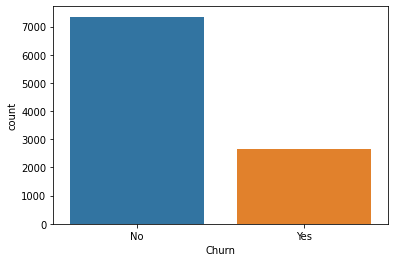

In [138]:
sns.countplot(data=df,
             x='Churn')

plt.show()

##### Bivariate

In [139]:
num_cols = set(df._get_numeric_data().columns)
cat_cols = set(df.columns) - num_cols
cat_cols.remove('Churn')

##### Bivariate

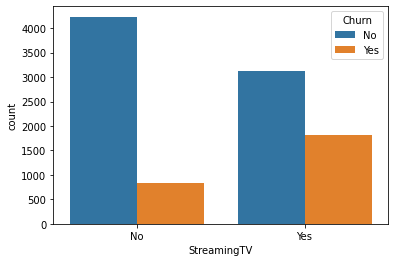

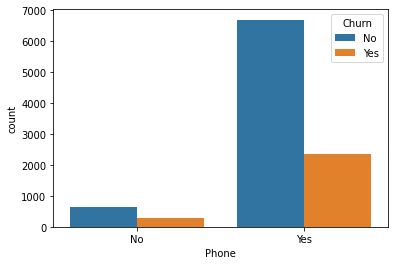

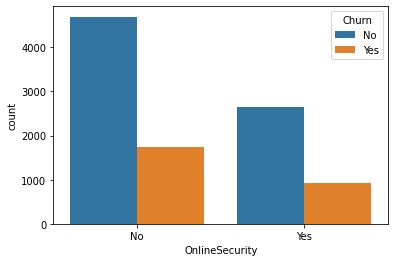

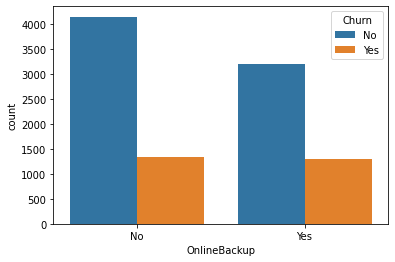

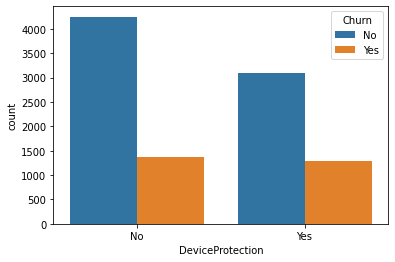

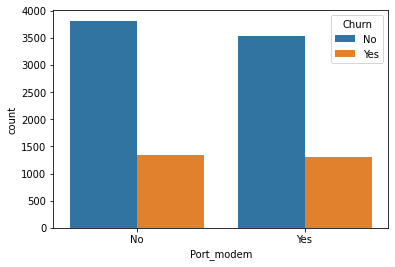

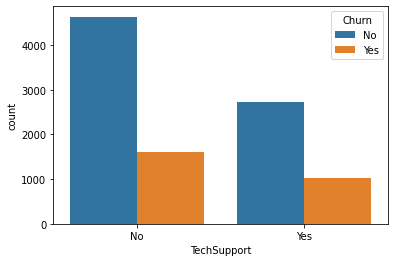

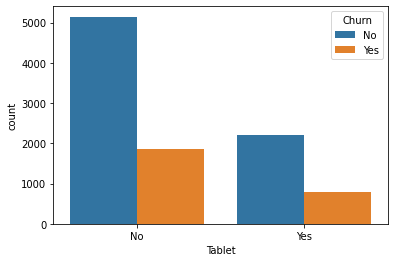

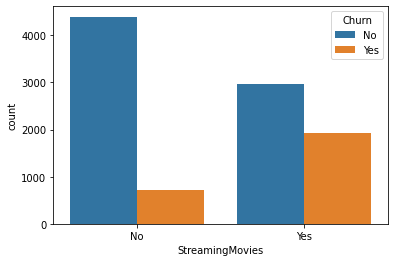

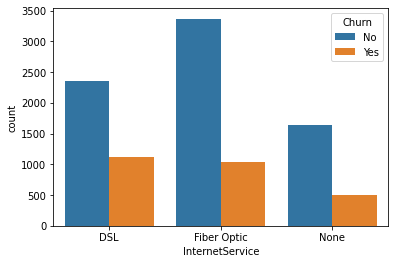

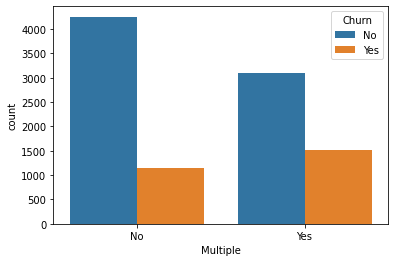

In [140]:
for i in df[cat_cols]:
    sns.countplot(data=df, x=i, hue='Churn')
    plt.show()

#### 5.  Provide a copy of the prepared data set.

In [141]:
df.to_csv('churn_model_ready')

## Part IV: Model Comparison and Analysis

### D.  Compare an initial and a reduced multiple regression model by doing the following:

#### 1.  Construct an initial multiple regression model from all predictors that were identified in Part C2



In [142]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, f_regression, chi2
def get_kbest(x_train, y_train):
    selector = SelectKBest(f_regression, k='all')
    X_train_new = selector.fit_transform(x_train, y_train) 
    mask = selector.get_support()    
    new_features = x_train.columns[mask]
    return(pd.DataFrame(sorted(zip(selector.scores_, new_features), reverse=True)))

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
clf = LinearRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

0.16960063676193737

#### 2.  Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

In [145]:
# get kbest score for each feature
kbest = pd.DataFrame(get_kbest(X_train, y_train))
kbest[0:15]

C:\Users\Freyja\anaconda3\envs\py39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,0,1
0,625.329907,StreamingMovies
1,401.180604,StreamingTV
2,126.104504,Multiple
3,74.064014,InternetService_DSL
4,29.613096,InternetService_Fiber Optic
5,23.631228,DeviceProtection
6,19.193080,OnlineBackup
7,10.987451,InternetService_None
8,4.281785,Phone
9,2.914524,Port_modem


In [148]:
kbest_feats=['StreamingMovies', 'StreamingTV', 'Multiple', 'InternetService_DSL', 'InternetService_Fiber Optic', 'InternetService_None']

In [149]:
X_train, X_test = X_train[kbest_feats], X_test[kbest_feats]

#### 3.  Provide a reduced multiple regression model.

In [152]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.16354936692560118

### E.  Analyze the data set using your reduced multiple regression model by doing the following:

#### 1.  Explain your data analysis process by comparing the initial and reduced multiple regression models, including the following elements:

* the logic of the variable selection technique

The variables selected for the linear regression model were those that could possibly have relevance to the problem. In this case we were just exploring whether subscriptions to various services affected the churn of customers, so we kept only subscription services such as internet type, whether they had phone service or not and the like.

The variables for the reduced linear regression model were selected using SelectKBest from sklearn from the regular linear regression model variables, and using f_regression which calculates the correlation between a regressor and a target variable, calculates an F-score and turns it into a p-value. The top value tell us the significance of the relationship between the value and the target. A correlation matrix was also used to decide if there was too much collinearity between two values, since that would break one of the assumptions of multiple linear regression.

* the model evaluation metric

The evaluation metric was the built in scoring method for LinearRegression in sklearn. The score for the first model was 0.16960063676193737, which is not an excellent score for trying to build a model to guess customer retention, being right only 17% of the time.

#### 2.  Provide the output and any calculations of the analysis you performed, including a confusion matrix.


Note: The output should include the predictions from the refined model you used to perform the analysis. 

#### 3.  Provide the code used to support the implementation of the multiple regression models.

In [158]:
y_pred

array([[ 0.61547852],
       [ 0.50317383],
       [ 0.36206055],
       ...,
       [-0.03564453],
       [ 0.61547852],
       [ 0.15649414]])

In [157]:
from sklearn.metrics import confusion_matrix
confusion_matrix(X_test, y_pred)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous targets

## Part V: Data Summary and Implications

### F.  Summarize your findings and assumptions by doing the following:

#### 1.  Discuss the results of your data analysis, including the following elements:

* a regression equation for the reduced model

* an interpretation of coefficients of the statistically significant variables of the model

* the statistical and practical significance of the model

* the limitations of the data analysis

#### 2.  Recommend a course of action based on your results.



## Part VI: Demonstration

### G.  Provide a Panopto video recording that includes all of the following elements:

* a demonstration of the functionality of the code used for the analysis

* an identification of the version of the programming environment

* a comparison of the two multiple regression models you used in your analysis

* an interpretation of the coefficients



### H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.



### I.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

“Sklearn.feature_selection.f_regression.” Scikit, https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html. 